In [ ]:
# Install package locally
%pip install git+https://github.com/cioos-siooc/ocean-data-parser.git

# Parse Amundsen INT to NetCDF

In [2]:
from ocean_data_parser.parsers import amundsen
import os
import requests
import folium
import matplotlib.pyplot as plt

In [3]:
def download_file_from_github(raw_url):
    """Download a github raw file localy"""
    odf_file_path = os.path.basename(raw_url)
    response = requests.get(raw_url)
    with open(odf_file_path, "w") as f:
        f.write(response.text)
    return odf_file_path

# CTD Rosette INT file


In [4]:
# Download file locally
odf_file_path = download_file_from_github("https://raw.githubusercontent.com/cioos-siooc/ocean-data-parser/development/tests/parsers_test_files/amundsen/12713_Rosette/2018_Amundsen_CTD_v1%202/1801_int/1801_001.int")


In [5]:
# Parse file
ds_profile = amundsen.int_format(odf_file_path)
ds_profile

<xarray.Dataset>
Dimensions:           (index: 381)
Coordinates:
  * index             (index) int64 0 1 2 3 4 5 6 ... 375 376 377 378 379 380
Data variables: (12/22)
    Pres              (index) float64 2.0 3.0 4.0 5.0 ... 380.0 381.0 382.0
    Temp              (index) float64 -1.28 -1.43 -1.419 ... 2.159 2.162 2.156
    Trans             (index) float64 98.09 98.13 98.18 ... 98.09 98.12 98.01
    Fluo              (index) float64 0.093 0.143 0.139 ... 0.047 0.04 0.039
    Sal               (index) float64 32.5 32.48 32.46 ... 34.16 34.16 34.16
    Dens              (index) float64 26.14 26.14 26.13 ... 29.07 29.07 29.07
    ...                ...
    SPar              (index) float64 1.254e+03 1.252e+03 ... 1.26e+03 1.046e+03
    ASAL              (index) float64 32.65 32.63 32.62 ... 34.32 34.32 34.32
    Cont              (index) float64 -1.273 -1.423 -1.412 ... 2.141 2.144 2.138
    D_ct              (index) float64 26.15 26.14 26.13 ... 29.07 29.07 29.08
    D0ct              (index) float64 26.14 26.13 26.11 ... 27.29 27.29 27.29
    instrument_depth  (index) float64 1.981 2.972 3.962 ... 376.0 377.0 378.0
Attributes:
    cruise_name:            BaySys-ArcticNet 2018
    cruise_number:          2018001
    original_filename:      CTD_2018001_001_1_DN.ODF
    station:                N01 (356)
    history:                2023-08-16T11:30:08-0400 WARNING No Vocabulary av...
    cast_number:            1
    initial_latitude_deg:   60.8307
    initial_longitude_deg:  -64.6823
    max_depth_m:            378.02
    min_depth_m:            2.18
    sounding_m:             386
    start_date_time_utc:    2018-05-31T18:07:39

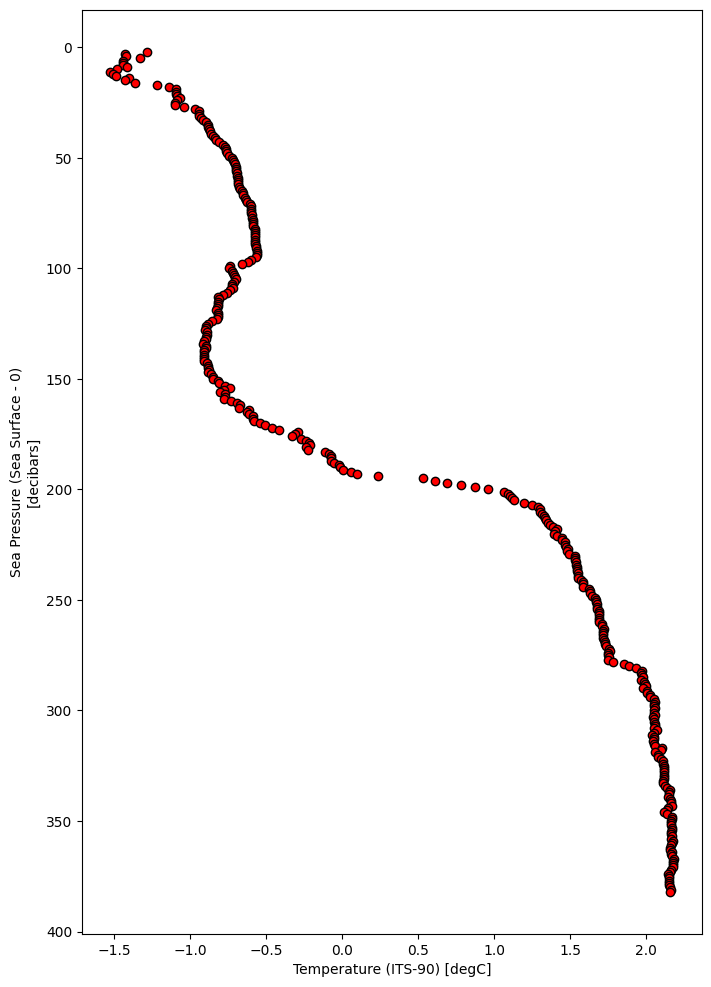

In [15]:
fig = plt.figure(figsize=[8,12],facecolor='w')
ds_profile.plot.scatter(x='Temp',y='Pres',facecolor='red',edgecolor='black', yincrease=False)

# Amundsen nav data

In [10]:
odf_file_trajectory = download_file_from_github("https://raw.githubusercontent.com/cioos-siooc/ocean-data-parser/development/tests/parsers_test_files/amundsen/12447_shiptrack_trajectory/NAV_Amundsen_V3/Complete_Data/2013_LEG_01/NAV_20130726.int")

In [11]:
ds_trajectory = amundsen.int_format(odf_file_trajectory)
ds_trajectory

<xarray.Dataset>
Dimensions:  (index: 17822)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 ... 17816 17817 17818 17819 17820 17821
Data variables:
    Date     (index) object '2013/07/26' '2013/07/26' ... '2013/07/26'
    Hour     (index) object '19:02:05' '19:02:06' ... '23:59:58' '23:59:59'
    Lat      (index) float64 46.81 46.81 46.81 46.81 ... 47.41 47.41 47.41 47.41
    Long     (index) float64 -71.2 -71.2 -71.2 -71.2 ... -70.45 -70.45 -70.45
    Heading  (index) float64 195.3 195.4 195.4 195.5 ... 26.84 26.82 26.82 26.84
    Roll     (index) float64 -0.3 -0.31 -0.31 -0.32 ... -1.01 -0.75 -0.5 -0.34
    Pitch    (index) float64 0.21 0.18 0.17 0.17 0.17 ... 0.28 0.28 0.27 0.26
    Heave    (index) float64 -0.01 0.0 0.0 -0.01 0.0 ... -0.02 -0.02 -0.02 -0.02
    Track    (index) float64 165.0 165.7 163.7 162.0 ... 22.4 22.4 22.2 22.0
    Speed    (index) float64 0.4 0.4 0.4 0.4 0.4 ... 10.5 10.5 10.5 10.5 10.5
    GPS      (index) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    time     (index) datetime64[ns] 2013-07-26T19:02:05 ... 2013-07-26T23:59:59
Attributes:
    cruise_number:           Amundsen_2013001
    time_coverage_start:     2013-07-26T19:02:05Z
    time_coverage_end:       2013-07-26T23:59:59Z
    time_coverage_duration:  P0DT4H57M54S
    end_date_time_utc:       2013-07-26T23:59:59
    final_latitude_deg:      47.4071
    final_longitude_deg:     -70.4473
    initial_latitude_deg:    46.808
    initial_longitude_deg:   -71.2026
    lat:                     Latidude [degrees N]
    long:                    Longitude [degrees E]
    start_date_time_utc:     2013-07-26T19:02:05

In [12]:
m = folium.Map(location=[ds_trajectory['Lat'].mean(),ds_trajectory['Long'].mean()])
folium.PolyLine(ds_trajectory[['Lat','Long']].to_pandas().values.tolist()).add_to(m)
m